## Handwritten Digit Recognizer  

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import idx2numpy
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Importing images(training data) from our directory using idx2numpy

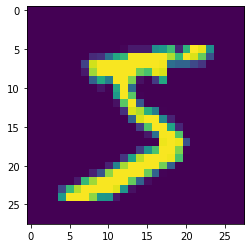

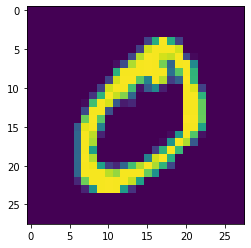

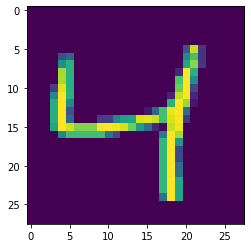

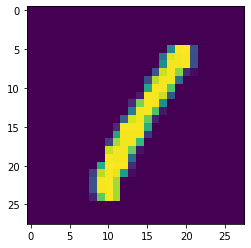

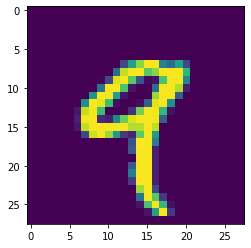

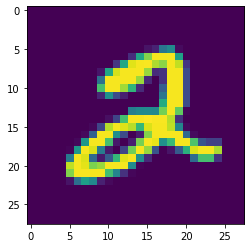

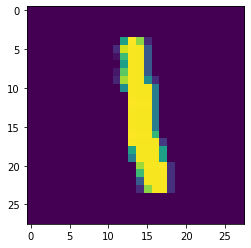

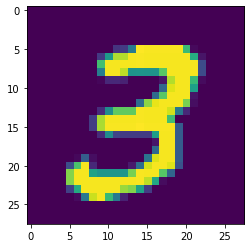

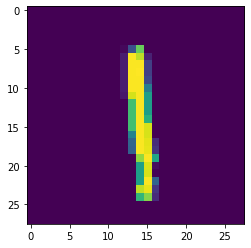

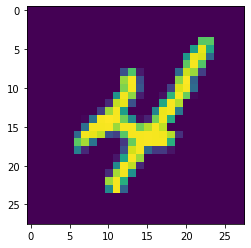

In [2]:
images_train=idx2numpy.convert_from_file('C:\\Users\\Nelson\\Documents\\ML_Dataset\\train-images.idx3-ubyte')
images_train_labels=idx2numpy.convert_from_file('C:\\Users\\Nelson\\Documents\\ML_Dataset\\train-labels.idx1-ubyte')

#visulaization of training data using matplotlib

for ind in range(0,10):
    plt.imshow(images_train[ind])
    plt.show()

# Images into numpy arrays as keras can accept only numpy arrays

In [3]:
images_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
images_train.shape

(60000, 28, 28)

In [5]:
images_train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Data preprocessing

In [6]:
images_train=images_train.reshape(-1,28,28,1)
images_train=images_train.astype('float32')
images_train=images_train/255
images_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Now you need to convert the class labels into a one-hot encoding vector.

In [7]:
images_train_labels=to_categorical(images_train_labels)

# Model the data

TensorFlow is a Python library for fast numerical computing created and released by Google

Keras is a deep learning library for the impelementaion of Neural Networks which was built on the top of tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import ReLU
from keras.layers import Flatten

# Neural Network Architecture

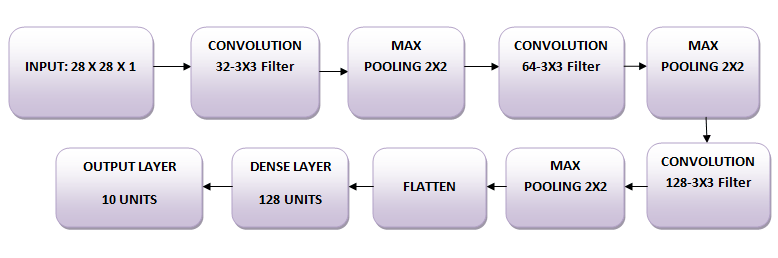

In [9]:
first_model=Sequential()
first_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',padding='valid',input_shape=(28,28,1)))          
first_model.add(ReLU())
first_model.add(MaxPooling2D(pool_size=(2,2)))
first_model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='valid'))
first_model.add(ReLU())
first_model.add(MaxPooling2D(pool_size=(2,2)))
first_model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='valid'))
first_model.add(ReLU())
first_model.add(MaxPooling2D(pool_size=(2,2)))
first_model.add(Flatten())
first_model.add(Dense(128,activation='linear'))
first_model.add(ReLU())
first_model.add(Dropout(0.5))
first_model.add(layers.Dense(10,activation='softmax'))

# compiling the model

In [10]:
first_model.compile(optimizer='Adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

#This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

# Training the model

In [11]:
train=first_model.fit(images_train,images_train_labels,validation_split=0.33,epochs=5,verbose=1)

Epoch 1/5
1257/1257 [==============================] - 52s 41ms/step - loss: 0.3370 - accuracy: 0.8958 - val_loss: 0.1048 - val_accuracy: 0.9672
Epoch 2/5
1257/1257 [==============================] - 51s 40ms/step - loss: 0.1110 - accuracy: 0.9687 - val_loss: 0.0719 - val_accuracy: 0.9775
Epoch 3/5
1257/1257 [==============================] - 53s 42ms/step - loss: 0.0771 - accuracy: 0.9784 - val_loss: 0.0618 - val_accuracy: 0.9812
Epoch 4/5
1257/1257 [==============================] - 42s 33ms/step - loss: 0.0616 - accuracy: 0.9816 - val_loss: 0.0615 - val_accuracy: 0.9810
Epoch 5/5
1257/1257 [==============================] - 47s 38ms/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 0.0569 - val_accuracy: 0.9830


# Importing test data

In [12]:
test_data=idx2numpy.convert_from_file('C:\\Users\\Nelson\\Documents\\ML_Dataset\\t10k-images.idx3-ubyte')
test_label=idx2numpy.convert_from_file('C:\\Users\\Nelson\\Documents\\ML_Dataset\\t10k-labels.idx1-ubyte')

# Preprocessing test data

In [13]:
test_data=test_data.reshape(-1,28,28,1)
test_data=test_data.astype('float32')
test_data=test_data/255
test_label=to_categorical(test_label)
test_data[0][7]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.32941177],
       [0.7254902 ],
       [0.62352943],
       [0.5921569 ],
       [0.23529412],
       [0.14117648],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

#evaluating our model on unknown data

In [14]:
test=first_model.evaluate(test_data,test_label,verbose=1)

313/313 [==============================] - 3s 9ms/step - loss: 0.0511 - accuracy: 0.9848


# our model's accuracy is 98%
#That's Pretty good

# plotting the models performance

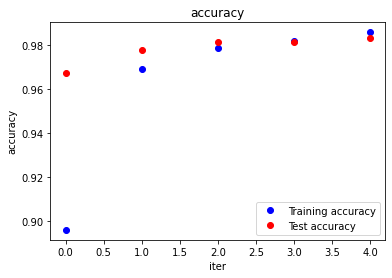

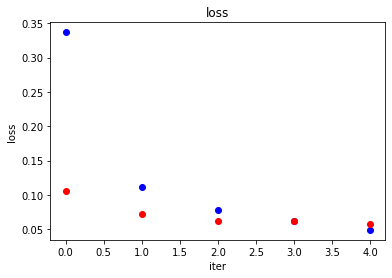

In [16]:
#plotting 
accuracy=train.history['accuracy']
test_accuracy=train.history['val_accuracy']
loss=train.history['loss']
test_loss=train.history['val_loss']
iterations=range(5)
plt.plot(iterations,accuracy,'bo',label='Training accuracy')
plt.plot(iterations,test_accuracy,'ro',label='Test accuracy')
plt.title('accuracy')
plt.xlabel('iter')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(iterations,loss,'bo')
plt.plot(iterations,test_loss,'ro')
plt.title('loss')
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

# prediction on real world data

In [17]:
test_predicted=first_model.predict(test_data)
predict=np.argmax(np.round(test_predicted),axis=1)

In [18]:
test_label=np.argmax(test_label,axis=1)
test_label

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# prediction of our model

predicted:  7


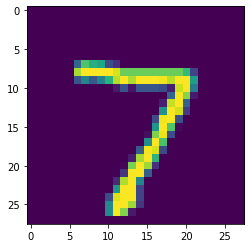

predicted:  2


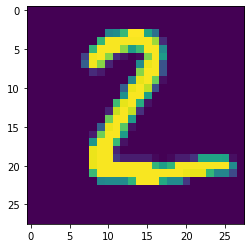

predicted:  1


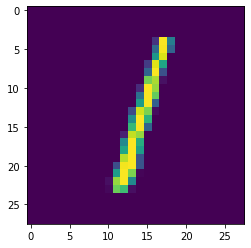

predicted:  0


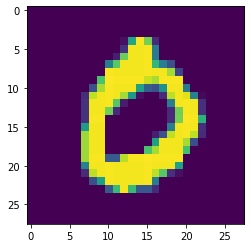

In [19]:
for i in range(0,4):
    print("predicted: ",predict[i])
    #print("actual: ",test_label[i])
    plt.imshow(test_data[i])
    plt.show()

# Saving our model parameters for future use

In [20]:
first_model.save('digit_recognizer.h5')